In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def rmse(base):

    output_dir = f"OUTPUTS/{base}/"

    pred = np.load(f"{output_dir}{base}_cv_all_pred.npy")
    true = np.load(f"{output_dir}{base}_cv_all_true.npy")

    nan_rows = np.isnan(pred).any(axis=1)
    pred_clean = pred[~nan_rows]
    true_clean = true[~nan_rows]

    rmse = np.sqrt(mean_squared_error(true_clean, pred_clean, multioutput='raw_values'))
    #for j, val in enumerate(rmse):
        #print(f"RMSE for label {j+1}: {val:.4f}")

    overall_rmse = np.sqrt(mean_squared_error(true_clean, pred_clean))
    #print(f"Overall RMSE: {overall_rmse:.4f}")

    return rmse, overall_rmse

In [7]:
label_rmse = {}
overall_rmse = {}

files = ["sfh_2000_5_20250826_174432",
         "sfh_2000_6_20250901_100953",
         "sfh_2000_7_20250901_101109",
         "sfh_2000_8_20250901_101117",
         "sfh_2000_9_20250901_101129",
         "sfh_2000_10_20250826_144749"]

for i, j in zip(range(5,11), files):
    label_rmse["{0} Labels RMSE".format(i)] = rmse(j)[0]
    overall_rmse["{0} Overall RMSE".format(i)] = rmse(j)[1]

Text(0.5, 1.0, 'RMSE per label')

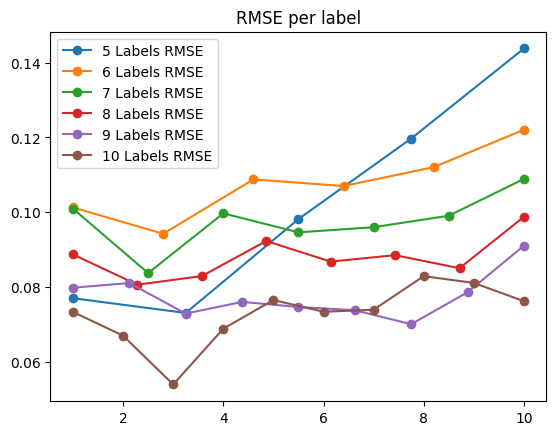

In [10]:
plt.figure()
for key, value in label_rmse.items():
    x = np.linspace(1, 10, len(value))
    y = value
    plt.plot(x, y, marker='o', label=key)
plt.legend()
plt.title("RMSE per label")

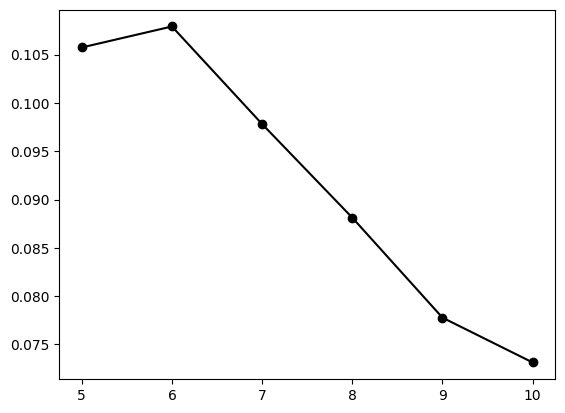

In [9]:
plt.figure()
plt.plot(range(5,11), overall_rmse.values(), 'ko-',)